<a href="https://colab.research.google.com/github/dajebbar/neural_style_tf/blob/main/neural_style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Style Transfer

Here’s a quick demo of how to make your own style transfers.

# Set up our Runtime

Colab needs to know we need to use a GPU-powered machine in order to do style transfers. At the top of this page, click on the Runtime tab, then select Change runtime type. In the modal that pops up, select GPU under the Hardware accelerator options.

We then need to make sure we’re using the latest version of Tensorflow 1, otherwise we get some annoying messages.

In [2]:
#install TF 1.15 to avoid some annoying warning messages
# Restart runtime using 'Runtime' -> 'Restart runtime...'
%tensorflow_version 1.x

import tensorflow as tf
print(tf.__version__)

1.15.2


# Install the neural-style-tf library
We’re going to work with the library called Neural Style. This is a version I’ve customized to do a couple things that I think are helpful for artists.

In the next cell, type `Shift+Return` to run the code

In [3]:
#import some image display tools
from IPython.display import Image, display
#install the library in colab
!git clone https://github.com/dvschultz/neural-style-tf
#change into that directory
%cd neural-style-tf/
#install the library dependencies (it's likely Colab already has them installed, but let's be sure)
!pip install -r requirements.txt
#install the VGG19 pre-trained model
!wget http://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat

Cloning into 'neural-style-tf'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 925 (delta 0), reused 0 (delta 0), pack-reused 921
Receiving objects: 100% (925/925), 85.25 MiB | 50.11 MiB/s, done.
Resolving deltas: 100% (467/467), done.
/content/neural-style-tf
--2021-01-27 15:25:31--  http://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat
Resolving www.vlfeat.org (www.vlfeat.org)... 64.90.48.57
Connecting to www.vlfeat.org (www.vlfeat.org)|64.90.48.57|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat [following]
--2021-01-27 15:25:31--  https://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat
Connecting to www.vlfeat.org (www.vlfeat.org)|64.90.48.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 534904783 (510M)
Saving to: ‘imag

In [4]:
#let's make sure we're in the right folder
!pwd
# we should see "/content/neural-style-tf"

/content/neural-style-tf


# A Basic Style Transfer

To make sure everything is working as expected, let’s run a basic style transfer using the images this library already provides.

First, let’s look at the folder setup. To the left of this text, click on the right pointing caret/arrow. That opens the Table of contents for this notebook. Click on the `Files` tab. This is a view of our "server." click on the arrow/twirley next to `neural-style-tf`. Then do the same for the `image_input` and `styles` folders. These two folders map to the Content (`image_input`) and Style (`styles`) images. I’m going to pick the lion from the content folder and the kandinsky from the styles folder.

There are two arguments required for the basic `neural_style.py` script:


*   `--content_img`: the content image filename plus extension
*   `--style_imgs`: the style image filename plus extension



In [5]:
!python neural_style.py --content_img lion.jpg --style_imgs kandinsky.jpg


---- RENDERING SINGLE IMAGE ----

2021-01-27 15:29:41.483090: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-27 15:29:41.540325: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-27 15:29:41.540883: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-01-27 15:29:41.541156: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-27 15:29:41.760043: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-27 15:29:41.896434: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened d

This may take a couple minutes to run, but if you see `Single image elapsed time: [some number]` then it has completed.

Let’s take a look at the content image, the style image, and what it combined to.

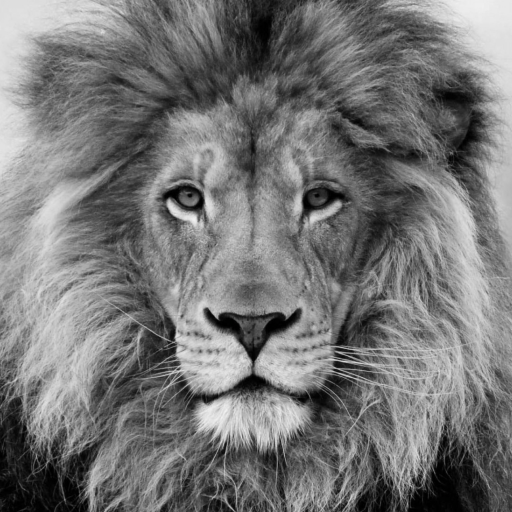

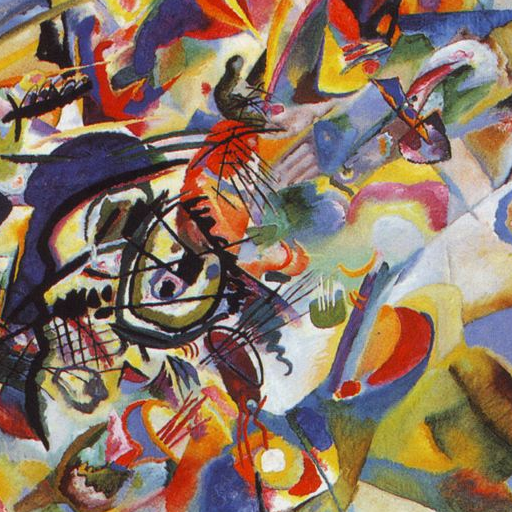

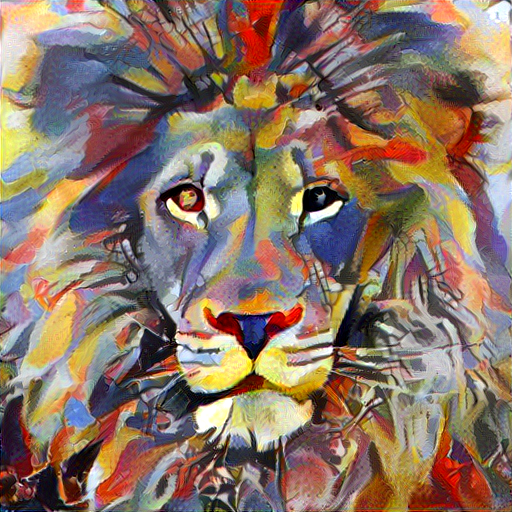

In [6]:
listOfImageNames = ['image_output/1000/content.png',
                    'image_output/1000/style_0.png',
                    'image_output/1000/image_output-1000.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

Using just this command you can now create custom style transfers. Upload a content image and style image into the correct folders in the panel to the left. Right click on each folder and choose `Upload`. **Important**: Anytime you restart your runtime, any files you upload (or create!) will be destroyed. Don’t lose your work!

Once your files are uploaded, edit the next cell with the image filenames you uploaded. Once edited, press `Shift+Return` to run the command.

In [7]:
!python neural_style.py --content_img {content filename} --style_imgs {style filename}

usage: neural_style.py [-h] [--verbose] [--img_name IMG_NAME] --style_imgs
                       STYLE_IMGS [STYLE_IMGS ...]
                       [--style_imgs_weights STYLE_IMGS_WEIGHTS [STYLE_IMGS_WEIGHTS ...]]
                       [--content_img CONTENT_IMG]
                       [--style_imgs_dir STYLE_IMGS_DIR]
                       [--content_img_dir CONTENT_IMG_DIR]
                       [--init_img_type {random,content,style}]
                       [--max_size MAX_SIZE] [--content_weight CONTENT_WEIGHT]
                       [--style_weight STYLE_WEIGHT] [--tv_weight TV_WEIGHT]
                       [--temporal_weight TEMPORAL_WEIGHT]
                       [--content_loss_function {1,2,3}]
                       [--content_layers CONTENT_LAYERS [CONTENT_LAYERS ...]]
                       [--style_layers STYLE_LAYERS [STYLE_LAYERS ...]]
                       [--style_scale STYLE_SCALE]
                       [--content_layer_weights CONTENT_LAYER_WEIGHTS [CONTENT_L